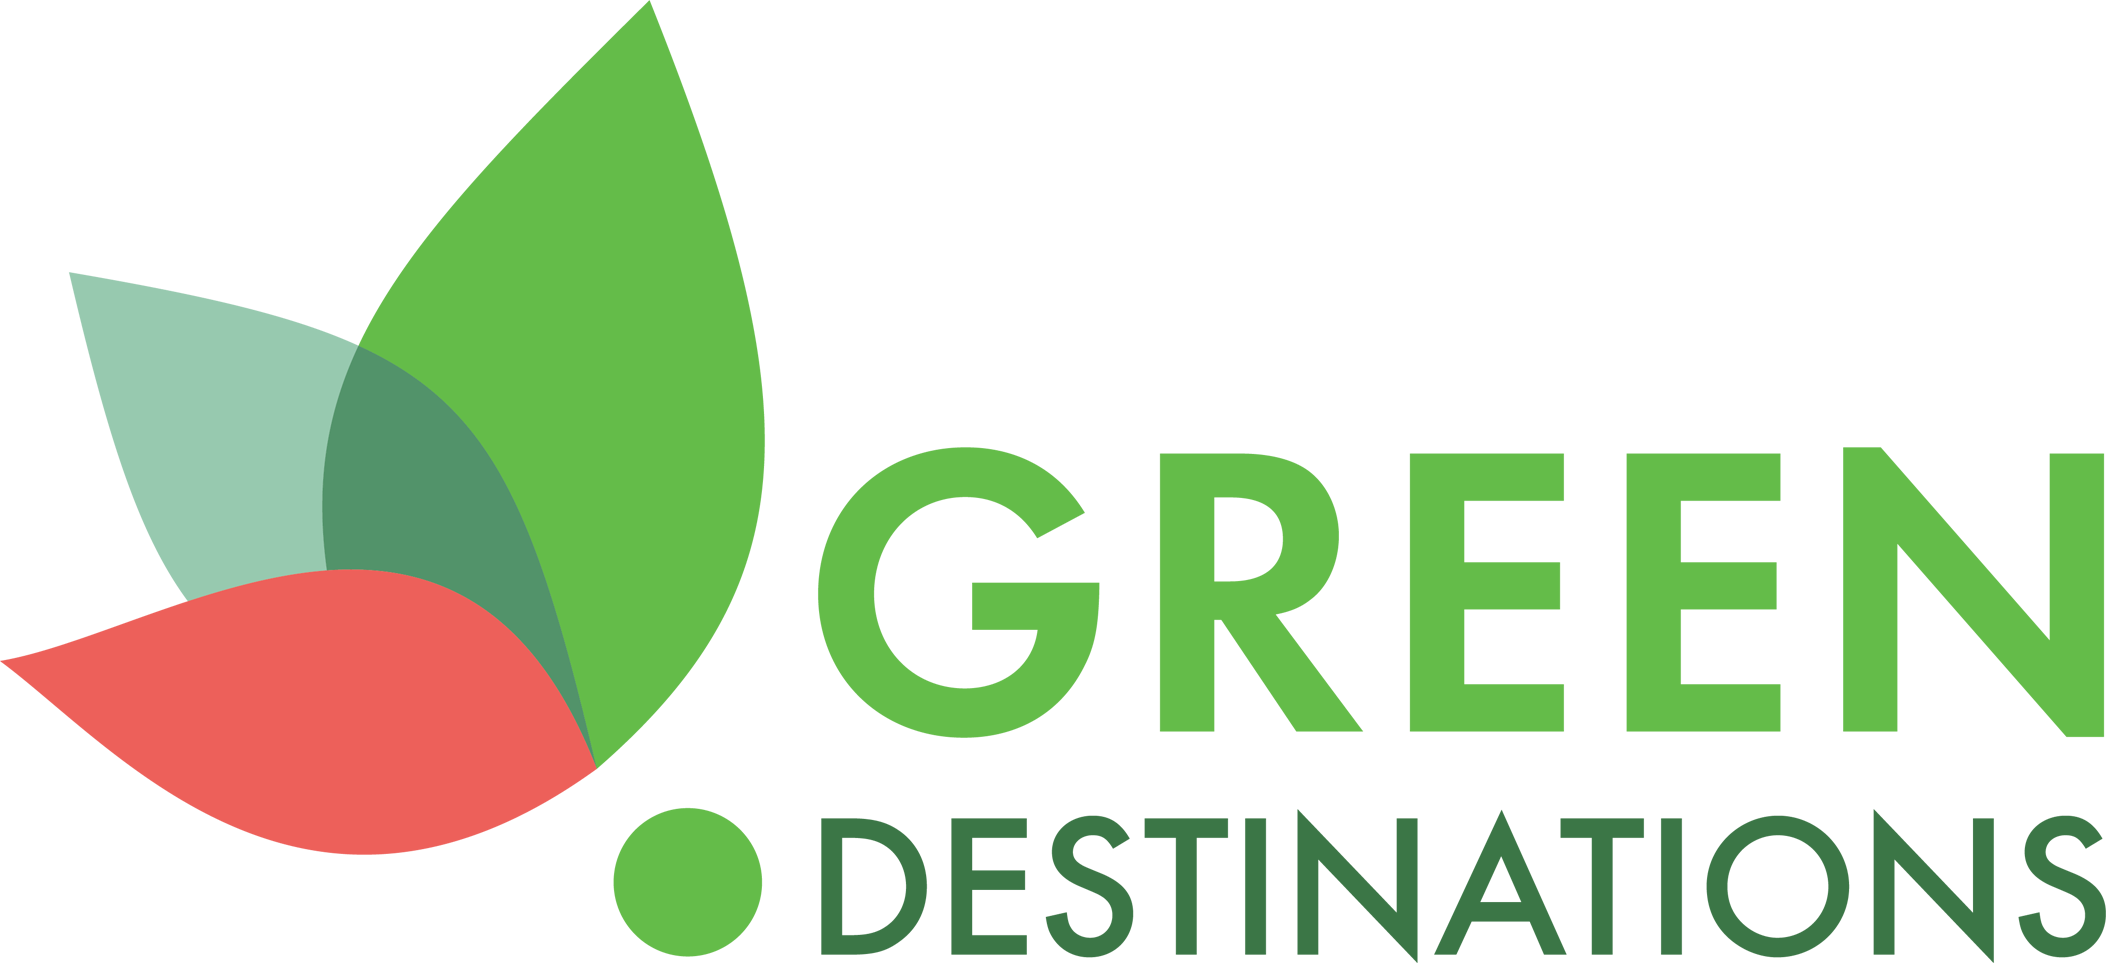

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('greendestination.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
total_employees = len(df)
employees_left = df[df['Attrition'] == 'Yes'].shape[0]

In [7]:
attrition_rate = (employees_left/total_employees) * 100
attrition_rate

16.122448979591837

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df['Attrition_Binary'] = df['Attrition'].apply(lambda x : 1 if x == 'Yes' else 0)

In [10]:
corr_matrix = df[['Age', 'YearsAtCompany','DailyRate','Attrition_Binary']].corr()
corr_matrix

,Age,YearsAtCompany,DailyRate,Attrition_Binary
Age,1.000000,0.311309,0.010661,-0.159205
YearsAtCompany,0.311309,1.000000,-0.034055,-0.134392
DailyRate,0.010661,-0.034055,1.000000,-0.056652
Attrition_Binary,-0.159205,-0.134392,-0.056652,1.000000


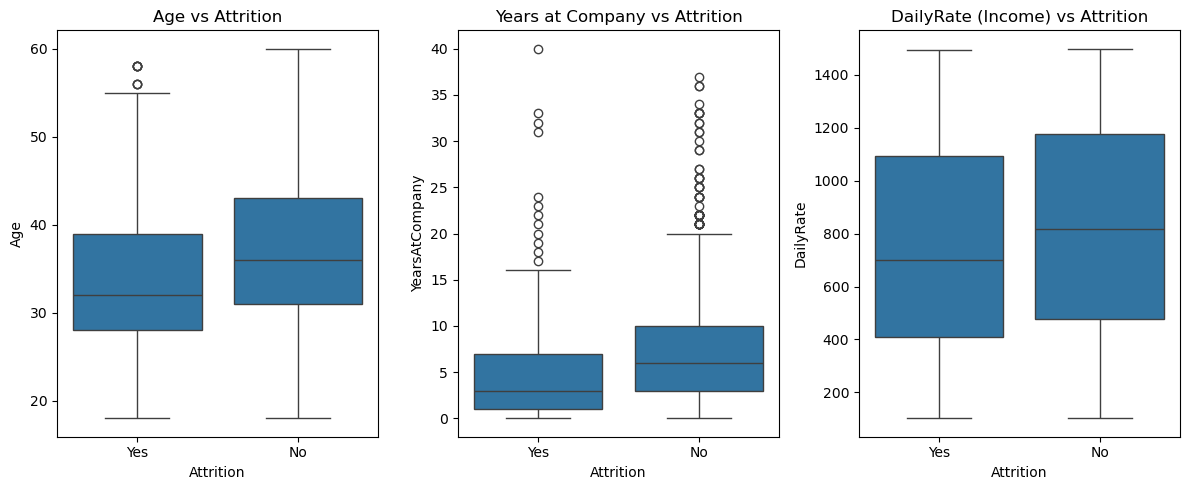

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(x='Attrition', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age vs Attrition')

sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axes[1])
axes[1].set_title('Years at Company vs Attrition')

sns.boxplot(x='Attrition', y='DailyRate', data=df, ax=axes[2])
axes[2].set_title('DailyRate (Income) vs Attrition')

plt.tight_layout()
plt.show()

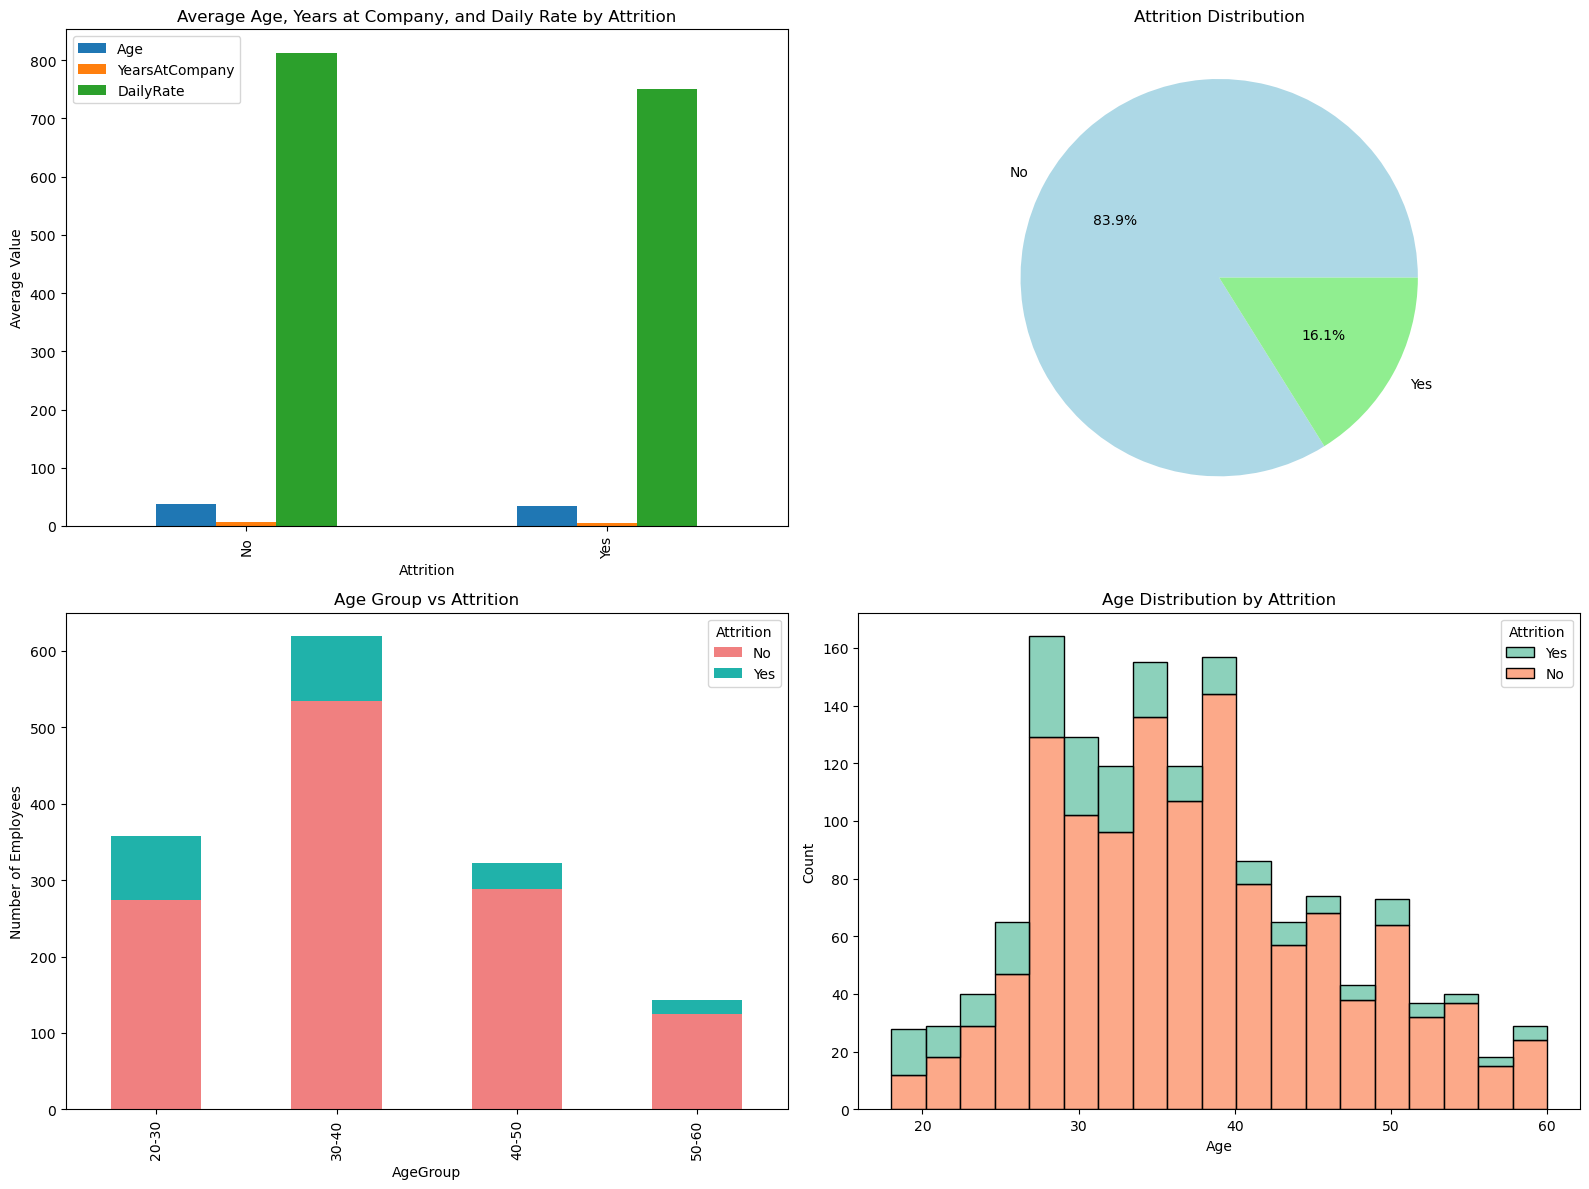

In [13]:
# Let's create the 4 charts: bar chart, pie chart, stacked bar chart, and histograms.

# Step 1: Bar Chart - Compare Average Age, Years at Company, and Income for Attrition vs Non-Attrition
# Grouping the data by Attrition and calculating means
attrition_grouped = df.groupby('Attrition')[['Age', 'YearsAtCompany', 'DailyRate']].mean()

# Step 2: Pie Chart - Show proportion of employees who left vs those who stayed
# Calculate proportion of employees who left vs stayed
attrition_counts = df['Attrition'].value_counts()

# Step 3: Stacked Bar Chart - Show distribution of employees who left vs stayed by age group
# Create age bins and categorize employees
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
age_group_counts = pd.crosstab(df['AgeGroup'], df['Attrition'])

# Step 4: Histograms - Show distribution of Age and Years at Company
# We will create two histograms, one for Age and one for Years at Company, colored by Attrition

# Begin plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Bar chart for average Age, Years at Company, and DailyRate
attrition_grouped.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Age, Years at Company, and Daily Rate by Attrition')
axes[0, 0].set_ylabel('Average Value')

# Plot 2: Pie chart for attrition distribution
attrition_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], colors=['lightblue', 'lightgreen'])
axes[0, 1].set_title('Attrition Distribution')
axes[0, 1].set_ylabel('')

# Plot 3: Stacked bar chart for AgeGroup vs Attrition
age_group_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['lightcoral', 'lightseagreen'])
axes[1, 0].set_title('Age Group vs Attrition')
axes[1, 0].set_ylabel('Number of Employees')

# Plot 4: Histograms for Age and Years at Company
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Age Distribution by Attrition')

plt.tight_layout()
plt.show()


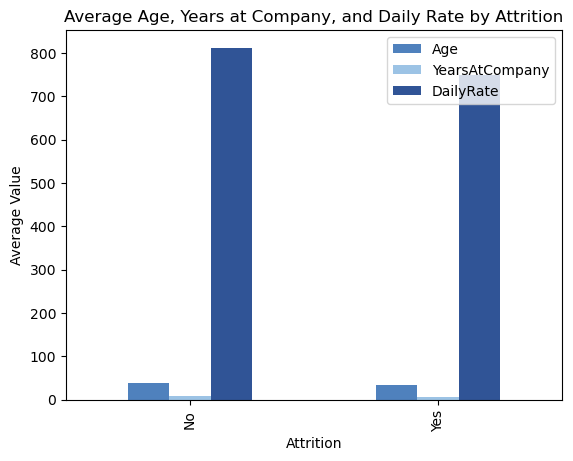

In [19]:
# Group data by Attrition and calculate the mean for Age, YearsAtCompany, and DailyRate
attrition_grouped = df.groupby('Attrition')[['Age', 'YearsAtCompany', 'DailyRate']].mean()

# Plot the bar chart using different blue shades
attrition_grouped.plot(kind='bar', color=['#4F81BD', '#9CC3E5', '#305496'])
plt.title('Average Age, Years at Company, and Daily Rate by Attrition')
plt.ylabel('Average Value')
plt.show()

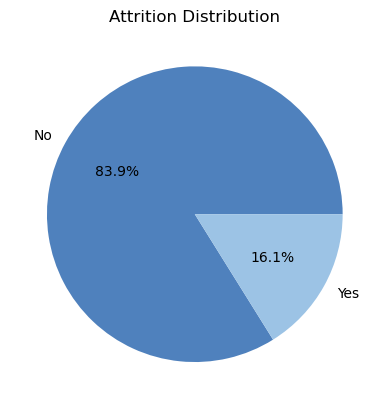

In [22]:
# Count number of employees who left and who stayed
attrition_counts = df['Attrition'].value_counts()

# Plot pie chart using blue shades
attrition_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#4F81BD', '#9CC3E5'])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()

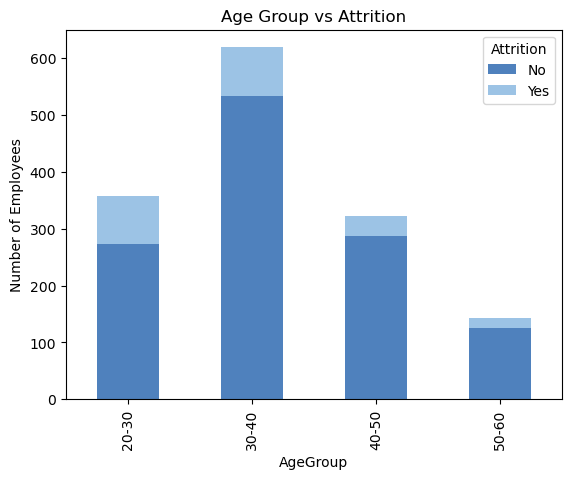

In [23]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Create crosstab of AgeGroup vs Attrition
age_group_counts = pd.crosstab(df['AgeGroup'], df['Attrition'])

# Plot stacked bar chart using blue shades
age_group_counts.plot(kind='bar', stacked=True, color=['#4F81BD', '#9CC3E5'])
plt.title('Age Group vs Attrition')
plt.ylabel('Number of Employees')
plt.show()

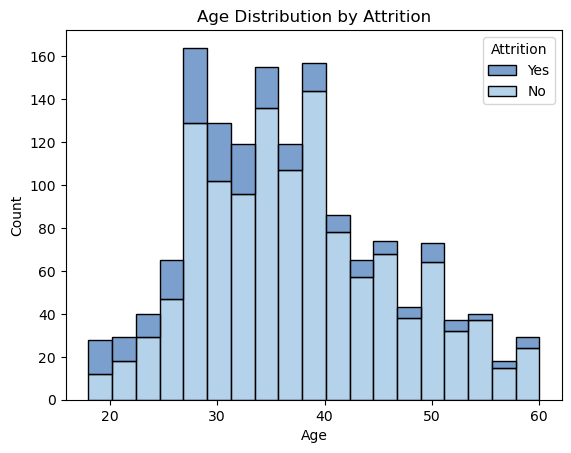

In [24]:
# Plot histograms for Age distribution by Attrition using blue shades
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette=['#4F81BD', '#9CC3E5'])
plt.title('Age Distribution by Attrition')
plt.show()

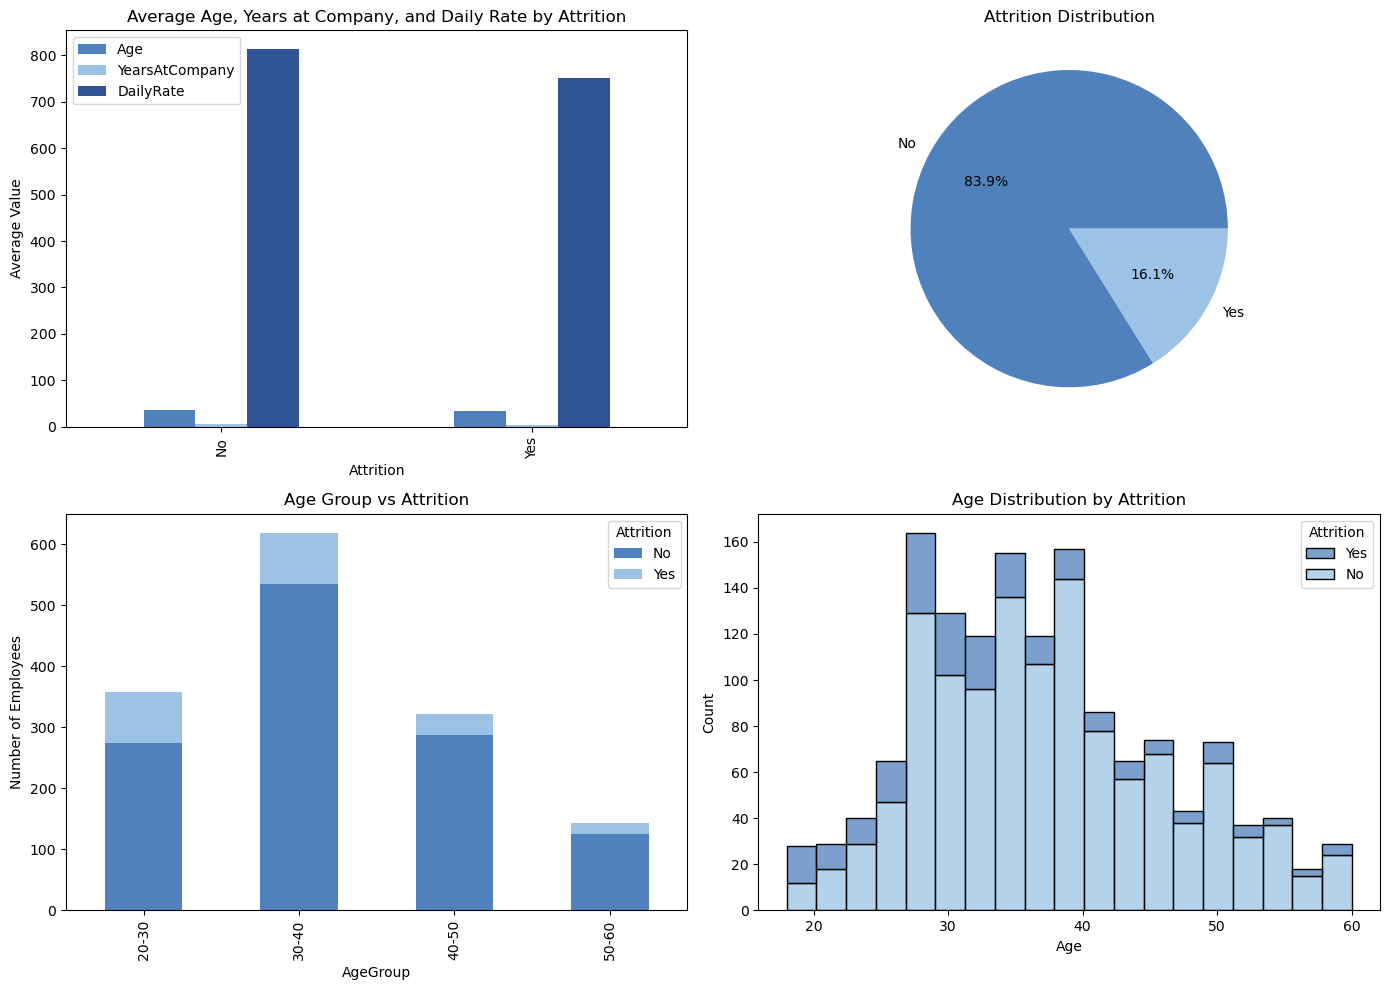

In [25]:
# Assuming your data is already loaded in df

# Create age groups for stacked bar chart
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Create aggregated data
attrition_grouped = df.groupby('Attrition')[['Age', 'YearsAtCompany', 'DailyRate']].mean()
attrition_counts = df['Attrition'].value_counts()
age_group_counts = pd.crosstab(df['AgeGroup'], df['Attrition'])

# Create dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar chart (Average Age, Years at Company, Daily Rate by Attrition)
attrition_grouped.plot(kind='bar', ax=axes[0, 0], color=['#4F81BD', '#9CC3E5', '#305496'])
axes[0, 0].set_title('Average Age, Years at Company, and Daily Rate by Attrition')
axes[0, 0].set_ylabel('Average Value')

# 2. Pie chart (Attrition Distribution)
attrition_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], colors=['#4F81BD', '#9CC3E5'])
axes[0, 1].set_title('Attrition Distribution')
axes[0, 1].set_ylabel('')

# 3. Stacked bar chart (Age Group vs Attrition)
age_group_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['#4F81BD', '#9CC3E5'])
axes[1, 0].set_title('Age Group vs Attrition')
axes[1, 0].set_ylabel('Number of Employees')

# 4. Histograms (Age Distribution by Attrition)
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette=['#4F81BD', '#9CC3E5'], ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Attrition')

# Adjust layout
plt.tight_layout()
plt.show()
